In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import collections
from pandas.io.json import json_normalize
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORT TABLE

In [2]:
table = pd.read_csv("Input/WomensWorldCup.csv")
table

,Year,Team 1,Score 1,Team 2,Score 2,Round,Date,Penalty Kicks,Penalty Score 1,Penalty Score 2,...,Shots on Goal 1,Shots on Goal 2,Shots Blocked 1,Shots Blocked 2,Fouls 1,Fouls 2,Corner Kicks 1,Corner Kicks 2,Possession 1,Possession 2
0,2019,FRA,4,KOR,0,Group,7-Jun,0,NaN,NaN,...,8,1,5,1,11,11,13,1,60,40
1,2019,GER,1,CHN,0,Group,8-Jun,0,NaN,NaN,...,5,1,5,1,7,19,8,3,62,38
2,2019,ESP,3,RSA,1,Group,8-Jun,0,NaN,NaN,...,12,2,8,2,12,13,5,2,72,28
3,2019,NOR,3,NGA,0,Group,8-Jun,0,NaN,NaN,...,4,1,2,2,5,10,5,5,57,43
4,2019,AUS,1,ITA,2,Group,9-Jun,0,NaN,NaN,...,7,3,3,1,20,19,6,3,57,43
5,2019,BRA,3,JAM,0,Group,9-Jun,0,NaN,NaN,...,6,3,4,4,14,9,10,3,57,43
6,2019,ENG,2,SCO,1,Group,9-Jun,0,NaN,NaN,...,6,4,2,2,8,8,9,2,56,44
7,2019,ARG,0,JPN,0,Group,10-Jun,0,NaN,NaN,...,1,3,2,0,6,6,0,5,39,61
8,2019,CAN,1,CMR,0,Group,10-Jun,0,NaN,NaN,...,4,1,6,1,10,12,10,4,65,35
9,2019,NZL,0,NED,1,Group,11-Jun,0,NaN,NaN,...,3,3,1,6,4,8,1,8,31,69


# IMPORT AND MANIPULATE API

In [3]:
url = "https://worldcup.sfg.io/teams/group_results"

In [4]:
response = requests.get(url)
x = response.json()

In [5]:
y = pd.DataFrame(x)

In [6]:
group1 = y["ordered_teams"][0]
group2 = y["ordered_teams"][1]
group3 = y["ordered_teams"][2]
group4 = y["ordered_teams"][3]
group5 = y["ordered_teams"][4]
group6 = y["ordered_teams"][5]

In [7]:
Group1 = pd.json_normalize(group1)
Group2 = pd.json_normalize(group2)
Group3 = pd.json_normalize(group3)
Group4 = pd.json_normalize(group4)
Group5 = pd.json_normalize(group5)
Group6 = pd.json_normalize(group6)

In [8]:
worldcup = pd.concat([Group1,Group2,Group3,Group4,Group5,Group6],axis=0)

In [9]:
worldcup1 = worldcup.set_index("id").sort_values(by="id")

In [10]:
worldcup1

,country,alternate_name,fifa_code,group_id,group_letter,wins,draws,losses,games_played,points,goals_for,goals_against,goal_differential
id,,,,,,,,,,,,,
1,France,None,FRA,1,A,4,0,1,5,12,10,4,6
2,Korea Republic,None,KOR,1,A,0,0,3,3,0,1,8,-7
3,Norway,None,NOR,1,A,2,1,2,5,7,7,7,0
4,Nigeria,None,NGA,1,A,1,0,3,4,3,2,7,-5
5,Germany,None,GER,2,B,4,0,1,5,12,10,2,8
6,China PR,None,CHN,2,B,1,1,2,4,4,1,3,-2
7,Spain,None,ESP,2,B,1,1,2,4,4,4,4,0
8,South Africa,None,RSA,2,B,0,0,3,3,0,1,8,-7
9,Australia,None,AUS,3,C,2,1,1,4,7,9,6,3


# MERGE INFORMATIONS

In [11]:
def fouls(x):
    return table[table["Team 1"]==x]["Fouls 1"].sum()+ table[table["Team 2"]==x]["Fouls 2"].sum()
worldcup1["Total Fouls"] = worldcup1["fifa_code"].apply(fouls)

In [12]:
def shots(x):
    return table[table["Team 1"]==x]["Shots on Goal 1"].sum()+ table[table["Team 2"]==x]["Shots on Goal 2"].sum()
worldcup1["Total Shots on Target"] = worldcup1["fifa_code"].apply(shots)

In [13]:
def blocked(x):
    return table[table["Team 1"]==x]["Shots Blocked 1"].sum()+ table[table["Team 2"]==x]["Shots Blocked 2"].sum()
worldcup1["Total Shots Blocked"] = worldcup1["fifa_code"].apply(blocked)

In [14]:
def corners(x):
    return table[table["Team 1"]==x]["Corner Kicks 1"].sum()+ table[table["Team 2"]==x]["Corner Kicks 2"].sum()
worldcup1["Total Corner Kicks"] = worldcup1["fifa_code"].apply(corners)

In [15]:
def avg(x):
    return (table[table["Team 1"]==x]["Possession 1"].sum()+table[table["Team 2"]==x]["Possession 2"].sum())/ (table[table["Team 1"]==x]["Possession 1"].count()+table[table["Team 2"]==x]["Possession 2"].count())
worldcup1["Average Possession"] = worldcup1["fifa_code"].apply(avg)                                                                                                            

In [16]:
def winrat(x):
    return worldcup1[worldcup1["fifa_code"]==x]["wins"]/worldcup1[worldcup1["fifa_code"]==x]["games_played"]
worldcup1["Win Ratio"] = winrat(worldcup1["fifa_code"])


# CLEAN THE TABLE

In [17]:
worldcup1["Average Possession"] = worldcup1["Average Possession"].round(1)

In [18]:
def percentage(x):
    return "{:.0%}".format(x)
worldcup1["Win Ratio per"] = worldcup1["Win Ratio"].apply(percentage)

In [19]:
worldcup1["Win Ratio"] = worldcup1["Win Ratio"].round(2)

In [20]:
wc = worldcup1[["country","fifa_code","group_letter","wins","draws","losses","games_played","goals_for","goals_against","goal_differential","Total Fouls","Total Shots on Target","Total Shots Blocked","Total Corner Kicks","Average Possession","Win Ratio","Win Ratio per"]]

In [21]:
wc1 = wc.rename(columns={"country":"Country","fifa_code":"FIFA code","group_letter":"Group","wins":"Wins","draws":"Draws","losses":"Losses","games_played":"Games Played","goals_for":"Goals Scored","goals_against":"Goals Received","goal_differential":"Difference"})

In [22]:
wc.to_csv("worldcup.csv")
wc1

,Country,FIFA code,Group,Wins,Draws,Losses,Games Played,Goals Scored,Goals Received,Difference,Total Fouls,Total Shots on Target,Total Shots Blocked,Total Corner Kicks,Average Possession,Win Ratio,Win Ratio per
id,,,,,,,,,,,,,,,,,
1,France,FRA,A,4,0,1,5,10,4,6,48,26,27,45,58.2,0.80,80%
2,Korea Republic,KOR,A,0,0,3,3,1,8,-7,32,15,13,11,52.7,0.00,0%
3,Norway,NOR,A,2,1,2,5,7,7,0,50,18,18,27,48.8,0.40,40%
4,Nigeria,NGA,A,1,0,3,4,2,7,-5,50,4,9,15,39.2,0.25,25%
5,Germany,GER,B,4,0,1,5,10,2,8,46,35,16,36,56.0,0.80,80%
6,China PR,CHN,B,1,1,2,4,1,3,-2,54,9,13,19,45.2,0.25,25%
7,Spain,ESP,B,1,1,2,4,4,4,0,36,24,24,22,59.5,0.25,25%
8,South Africa,RSA,B,0,0,3,3,1,8,-7,28,4,4,6,39.0,0.00,0%
9,Australia,AUS,C,2,1,1,4,9,6,3,46,23,10,24,55.5,0.50,50%


# CREATE THE ANALITICAL GRAPHS

<AxesSubplot:xlabel='Difference'>

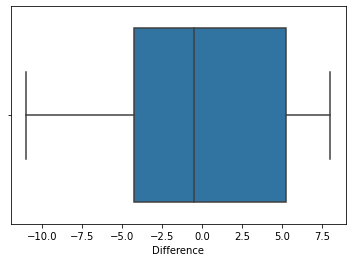

In [23]:
sns.boxplot("Difference",data = wc1,showfliers=False)

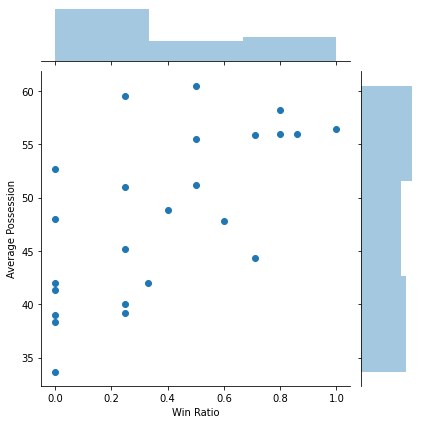

In [24]:
sns.jointplot(x="Win Ratio",y="Average Possession",data=wc1)

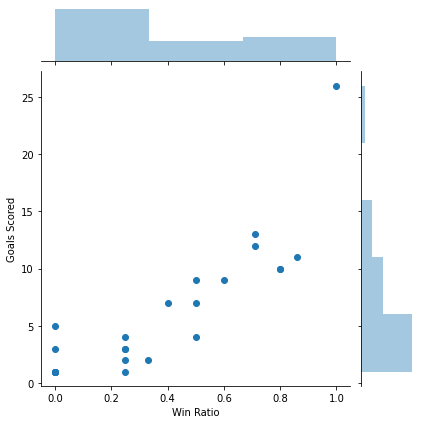

In [25]:
sns.jointplot(x="Win Ratio",y="Goals Scored",data = wc1)

<AxesSubplot:xlabel='Win Ratio', ylabel='Total Shots Blocked'>

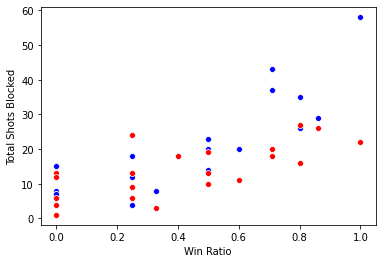

In [26]:
sns.scatterplot(x="Win Ratio",y="Total Shots on Target",data=wc1,color="blue") 
sns.scatterplot(x="Win Ratio",y="Total Shots Blocked",data=wc1,color="red")    

# CREATE THE ANALYTICAL FUNCTIONS

In [27]:
def group(x):
    return pd.DataFrame(wc1[wc1["FIFA code"]==x]["Group"])

In [28]:
def wins(x):
    return pd.DataFrame(wc1[wc1["FIFA code"]==x]["Wins"])

In [29]:
def draws(x):
    return pd.DataFrame(wc1[wc1["FIFA code"]==x]["Draws"])

In [30]:
def losses(x):
    return pd.DataFrame(wc1[wc1["FIFA code"]==x]["Losses"])

In [31]:
def goals(x):
     return pd.DataFrame(wc1[wc1["FIFA code"]==x]["Goals Scored"])

In [32]:
def received(x):
    return pd.DataFrame(wc1[wc1["FIFA code"]==x]["Goals Scored"])

In [33]:
def groupgoals(x):
    return wc1[wc1["Group"]==x]["Goals Scored"].sum()

In [34]:
def groupfouls(x):
    return wc1[wc1["Group"]==x]["Total Fouls"].sum()

In [35]:
def jointplot(x,y):
    return sns.jointplot(x,y,wc1)

In [36]:
def boxplot(x):
    return sns.boxplot(x,data=wc1)

In [37]:
def scatterplot(x,y,c):
    return sns.scatterplot(x,y,data=wc1) and sns.scatterplot(x,c,data=wc1)